### Afshan Anam Saeed 21-741-954

# Assignment 3- Network Science
## Centrality Measures

Importing all the libraries to be used in the exercise-

In [1]:
import networkx as nx                           #for network analysis
import numpy as np                              #for mathematical analysis
import matplotlib.pyplot as plt                 #for visualization
import scipy.stats as sp                        #for statistical functions

#### Importing the datasets

Certain datasets have been provided to us as .gml files. They are mainly:
1. 9-11 terrorist network: Nodes represent individuals and Edges represent their known social associations, centered around the hijackers that carried out the September 11th, 2001 terrorist attacks.
2. Jazz collaboration network: Nodes represent jazz musicians and Edges represent collaborations in bands that performed between 1912 and 1940.
3. Political blogs network: Nodes represent political weblogs from before the 2004 election and Edges represent hyperlinks among them.
4. “Florida_foodweb.graphml” each node is a species, and a directed link exists between 𝑖 and 𝑗 if 𝑖 feeds from 𝑗.

Importing these datasets using the networkx function-

In [2]:
terrorists=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data (1)\\data\\graph_terrorists.gml")
jazz_collab=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data (1)\\data\\graph_jazz_collab.gml")
political_blogs=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data (1)\\data\\graph_polblog.gml")

#### Part 1: Obtaining centrality correlations

Writing a function to compute the degree, closeness, betweenness and eigen vector centerality for each node. Next using the function, I will define another function to do a scatter plot for each pair of centerality. Additionally, other factors like the Pearson's Correlation, Spearman’s and Kendall’s correlation coefficients will be calculated in the function for each pair and will be noted on the scatter plots.

In [3]:
def centrality_measures(name_of_network):                                            #function for only centrality measurements
    
    #computing the degree centrality
    cent=nx.degree_centrality(name_of_network)                                       #using the pre-defined function to compute the degree centrality
    degree_centrality=list(cent.values())                                            #extracting the values off the dictionary to get only the degree centrality values list
    
    #computing the betweenness
    between=nx.betweenness_centrality(name_of_network)                               #using the pre-defined function to compute the betweenness.     
    betweenness=list(between.values())                                               #extracting the values off the dictionary to get only the betweenness values list
    
    #computing the closeness
    close=nx.closeness_centrality(name_of_network)                                   #using the pre-defined function to compute the closeness.
    closeness=list(close.values())                                                   #extracting the values off the dictionary to get only the closeness values list
    
    #computing the eigenvector
    eigen=nx.eigenvector_centrality(name_of_network)                                 #using the predefined function to compute the eigenvectors.
    eigenvector=list(eigen.values())                                                 #extracting the values off the dictionary to get only the eigenvector values list
    
    #defining a dictionary with labels of all the centrality measures
    centrality={"Degree Centrality":degree_centrality,"Betweenness":betweenness,"Closeness":closeness,"EigenVector":eigenvector}
    
    return centrality                                                                #returning the dictionary

In [4]:
def plot_centrality_measures(name_of_network,name_of_file):                         #defining a centrality plot function
    
    centrality=centrality_measures(name_of_network)                                 #defining a dictionary of all centrality measures
    
    values=[]                                                                       #defining a list of all the plotted centrality measures to remove duplicacy
    for i,j in centrality.items():                                                  #iterating over the centrality list
        for k,l in centrality.items():                                              #re-iterating over the centrality list
            if i!=k and (i,k) not in values:                                        #removing the equality so that a measure is not plotted against itself and a plot is not duplicated
                pearson=round(sp.pearsonr(j,l)[0],3)                                #calculating the pearson corrlation
                kendall=round(sp.kendalltau(j,l)[0],3)                              #calculating the kendall correlatin
                spearman=round(sp.spearmanr(j,l)[0],3)                              #calculating the spearman correlation
            
                #plot the scatter plots between these coefficients
                plt.scatter(j,l)                                                    #defining the scatter plot
                plt.xlabel(i)                                                       #labelling the x axis
                plt.ylabel(k)                                                       #labelling the y axis
                plt.figtext(1.0, 0.8,"The pearson's correlation is "+str(pearson), ha="left")                 #adding the Pearsons's correlation to the plot
                plt.figtext(1.0, 0.75,"The Kendall's correlation is "+str(kendall), ha="left")                #adding the Kendall's correlation to the plot
                plt.figtext(1.0, 0.7,"The spearman's correlation is "+str(spearman), ha="left")               #adding the Spearman's correlation to the plot
                plt.title("The graph depicting the relation between "+i+" and "+k+" for "+name_of_file)       #adding the title of the scatter plot
                plt.show()                                                          #displaying the graph
                values.append((i,k))                                                #appending the plotted value graph to the list of plotted items
                values.append((k,i))                                                #appending the transpose of the plotted graph to the list of plotted items to avoid duplicacy
            else:
                continue                                                            #continuing the program in case conditions are not met

Using the defined functions to produce scatter plots for different centrality measures for the given datasets-

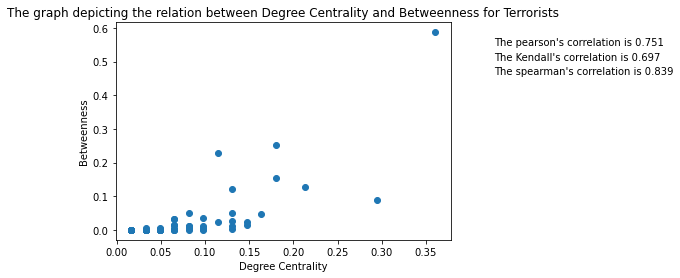

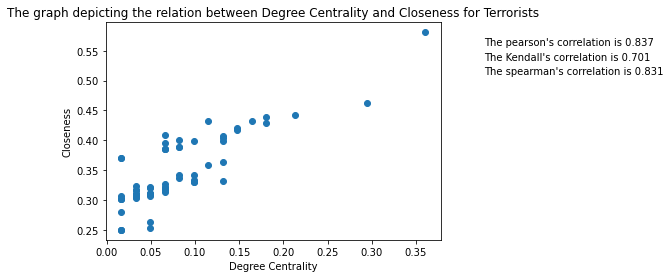

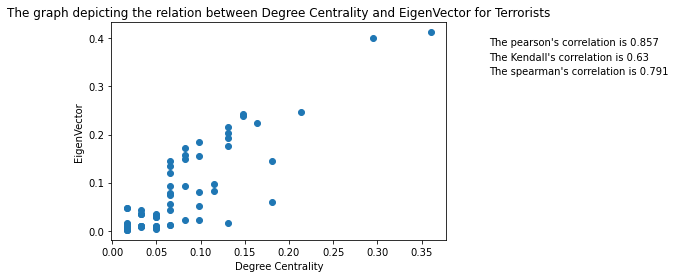

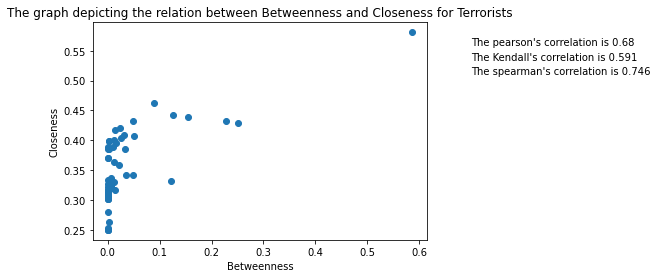

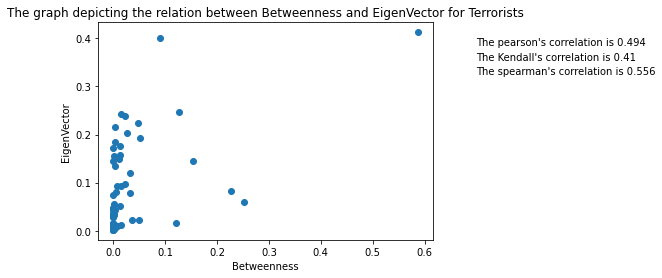

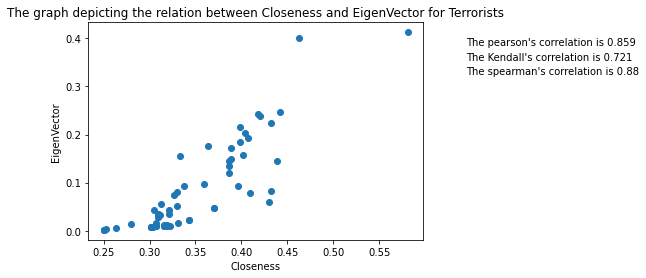

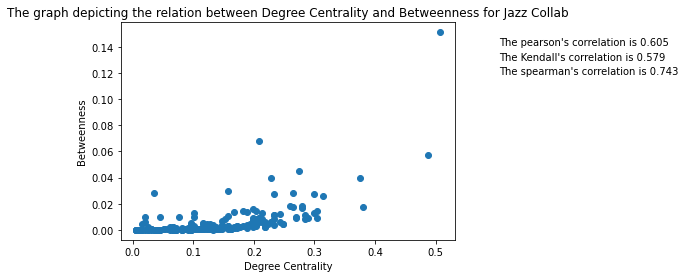

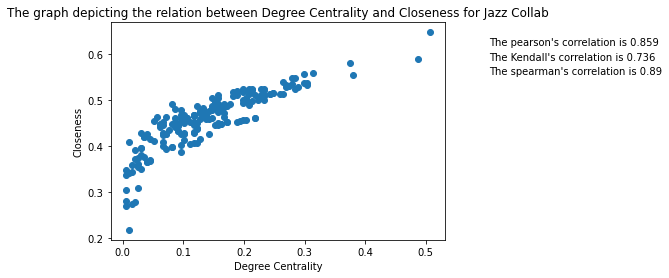

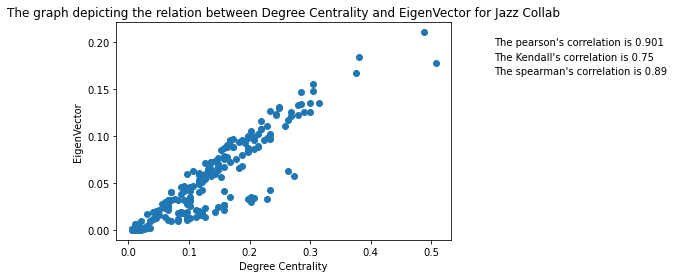

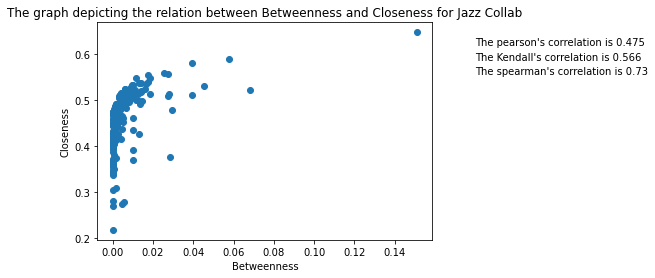

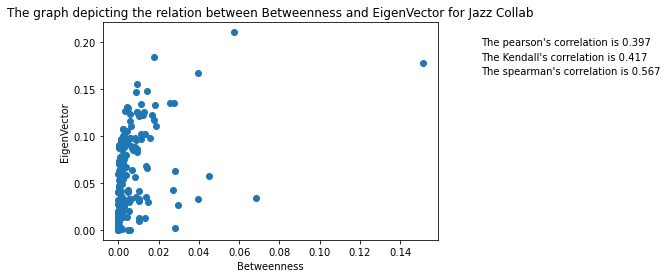

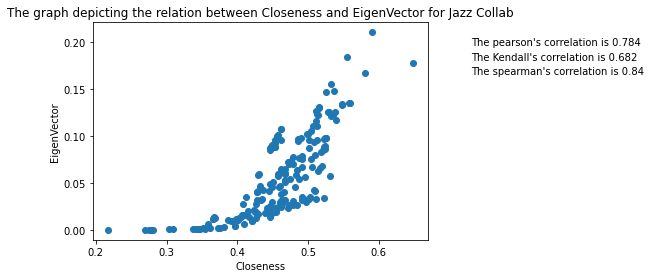

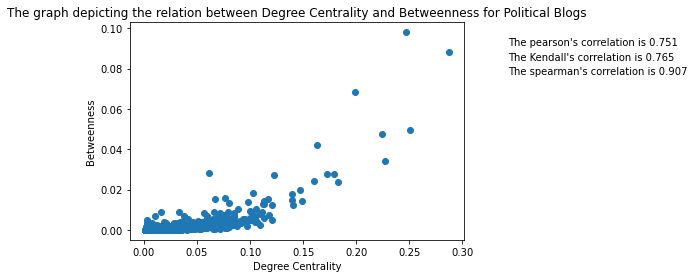

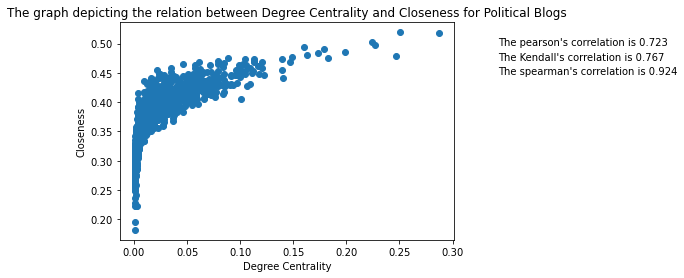

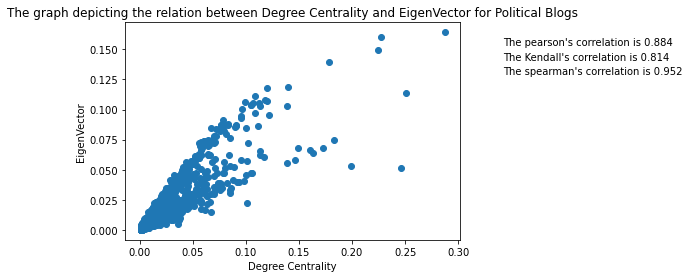

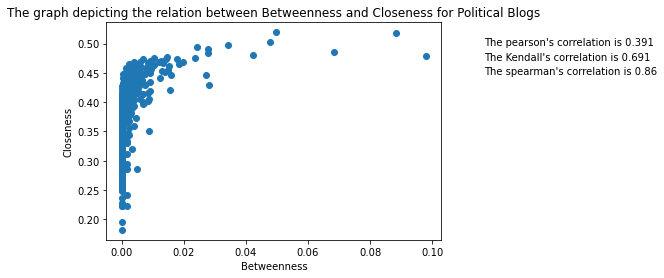

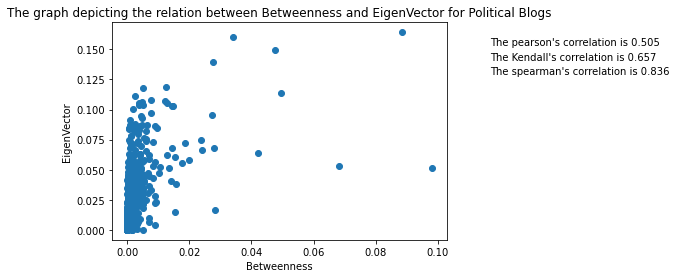

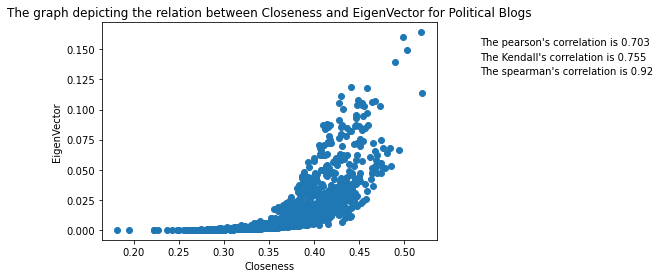

In [5]:
plot_centrality_measures(terrorists,"Terrorists")
plot_centrality_measures(jazz_collab,"Jazz Collab")
plot_centrality_measures(political_blogs,"Political Blogs")

In the given graphs above, for every dataset, 6 graphs with different combinations of centrality measures have been plotted along the two axis. Certain general observations from the above graphs for Jazz Collaboration dataset are-

1. As the degree centrality increases, so does the betweeness, closeness and the eigen vector values. Closeness seems to increase exponentially with increasing centrality, eigen vector linearly, and betweenness also shows a poor linear relation. This means a more connected network with more popularity and edges has greater important nodes, that can easily reach other nodes in the shortest distances and contribute more effectively to the network. The corresponding correlation measures are also high.

###### In the Jazz terms, the musician with the higher number of connections is the most important person in the whole network of jazz musicians. It also means that in order for a message to pass fast and efficiently between other musicians, it is important to approach these well connected musicians. 

2. Closeness and Eigen Vectors generally do not show much strong relation to the betweenness of a node. This means a node in between may not always be an important node. It may not be connected to other important nodes, as depicted by the eigen vector values and it may not always be easily reachable by other nodes. The corresponding correlation coefficients are also slightly on the lower end, although they are positive.

##### In the physical terms, the musicians that may have the shortest and closest measures of conecting with other musicians may not always be an important musician. These musicians may only be restricted to their small community and may not be necessarily well known to the wider network. Also, they may not be connected to important musicians.

3. Eigenvector and the closeness centralities seem to be positively correlated. Thus, a node which can easily reach other nodes in the shortest connected path becomes more important as it can reach an important node easily.

##### In the jazz network, if the closeness, or the connectivity of all nodes amongst themselves is minimal, then they have a higher chance to know an important, well known musician. These musicians naturally become more important than the rest.

Similar relations are also observed for other Datasets.

#### Part 2: Centrality and Randomness

In this part, I will be defining a function to plot the centrality measures befor and after randomization. Here, I will first randomize the dataset, obtain the centrality measures of both the real and random network, and plot a scatter plot of measures before and after randomization. I will also calculate their corresponding correlation factors. 

In [6]:
def randomness_centrality(name_of_network,name_of_file):                                                         #defining the centrality function
    
    #randomizing the network
    name_of_random_network=nx.algorithms.smallworld.random_reference(name_of_network,niter=3,connectivity=False) #function to randomize the network
    
    #getting the dictionary of all centrality measures for real network
    centrality_real=centrality_measures(name_of_network) 
    
    #getting the dictionary of all centrality measures for random network
    centrality_random=centrality_measures(name_of_random_network)
    
    for i,j in centrality_real.items():                                                      #iterating over real centrality measures
        for k,l in centrality_random.items():                                                #iterating over random centrality measures
            if i==k:                                                                         #equating for similar centrality measures
                pearson=round(sp.pearsonr(j,l)[0],3)                                         #calculating the Pearson's correlation
                kendall=round(sp.kendalltau(j,l)[0],3)                                       #calculating the Kendall's correlation
                spearman=round(sp.spearmanr(j,l)[0],3)                                       #calculating the Spearman's correlation
            
                #plot the scatter plots between these coefficients
                plt.scatter(j,l)                                                             #defining the scatter plot
                plt.xlabel(i+" Real")                                                        #labelling the x axis
                plt.ylabel(k+" Random")                                                      #labelling the y axis
                plt.figtext(1.0, 0.8,"The pearson's correlation is "+str(pearson), ha="left")                  #adding the Pearson's correlation to the plot
                plt.figtext(1.0, 0.75,"The Kendall's correlation is "+str(kendall), ha="left")                 #adding the Kendall's correlation to the plot
                plt.figtext(1.0, 0.7,"The spearman's correlation is "+str(spearman), ha="left")                #adding the Spearman's correlation to the plot
                plt.title("The scatter plot depicting the "+i+" centrality for Real and Random Networks of "+name_of_file+" Network")        #adding a title to the graph
                plt.show()                                                                   #displaying the graph
            else:
                continue                                                                     #continue running the function in case of inequality

Plotting the above function for different datasets

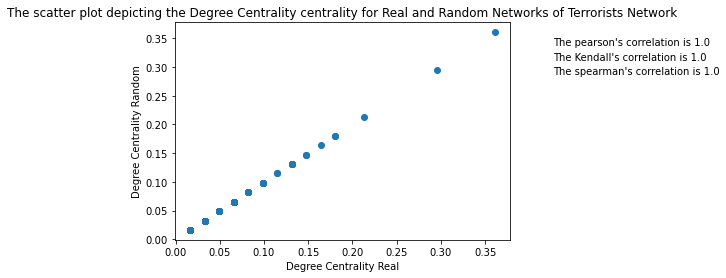

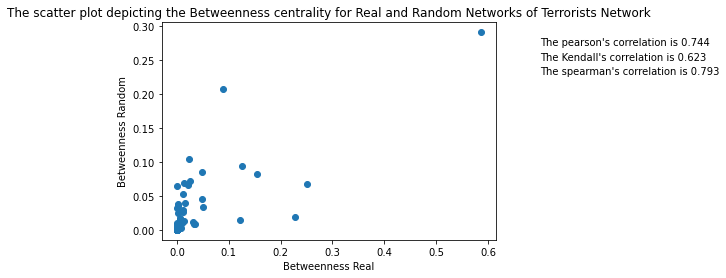

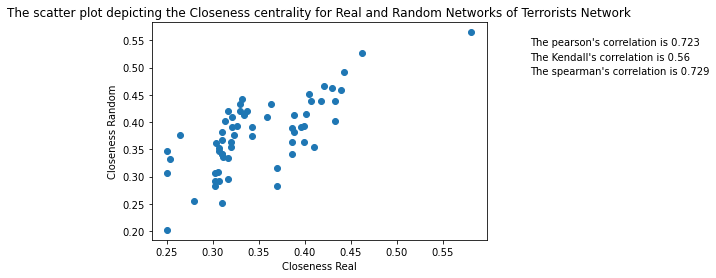

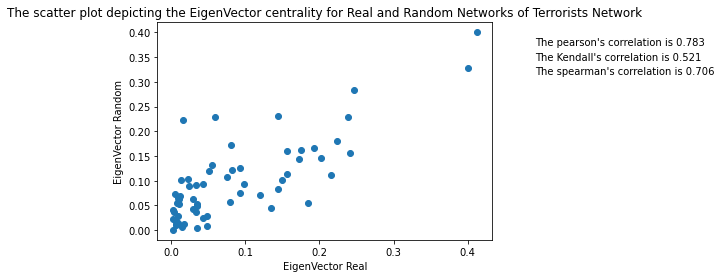

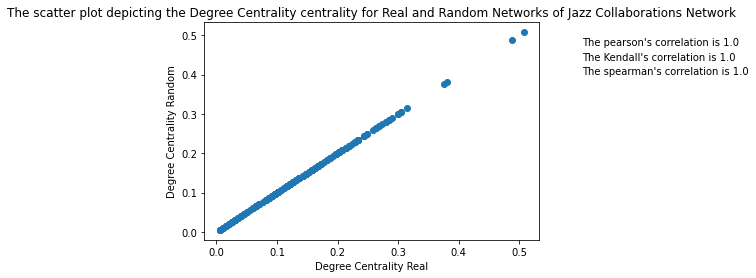

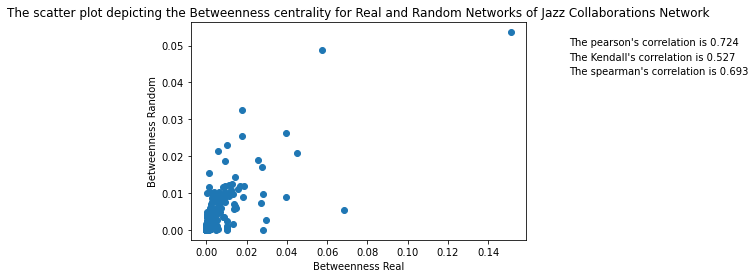

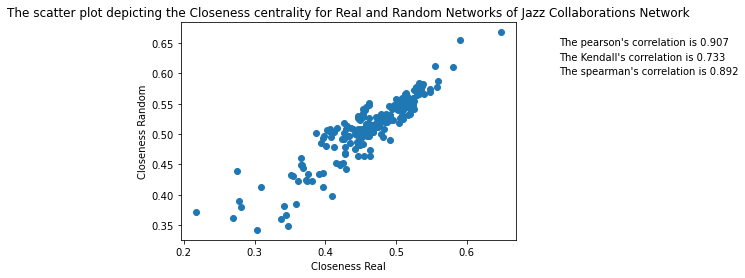

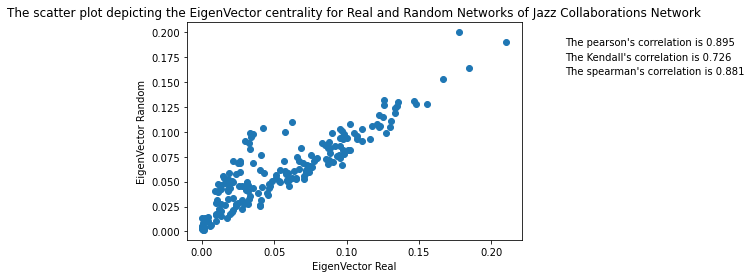

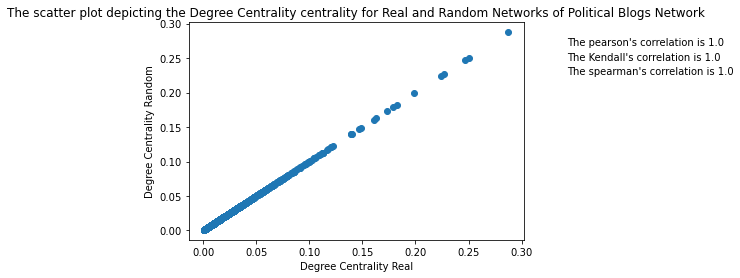

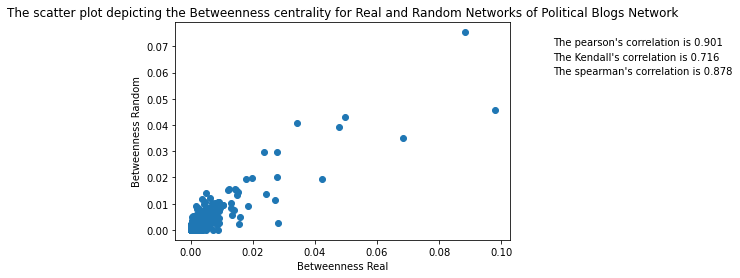

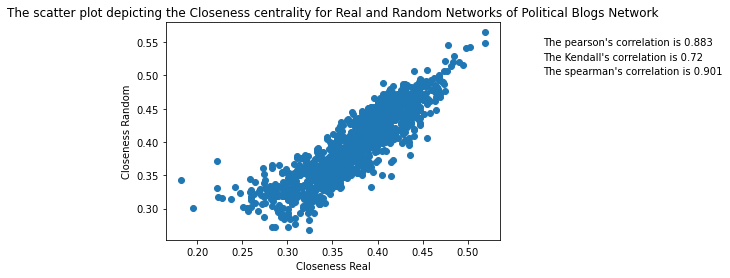

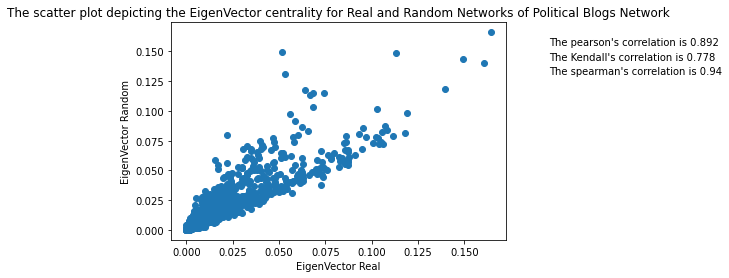

In [7]:
randomness_centrality(terrorists,"Terrorists")
randomness_centrality(jazz_collab,"Jazz Collaborations")
randomness_centrality(political_blogs,"Political Blogs")

The measure for degree centrality is a measure of the links the node has to others in a network. Mathematically it is a summation of all the edges in a network. When randomizing a network, the degree is often preserved for a node. This means, the are no changes seen in the overall number of nodes and edges. This means that the degree centrality remains the same. On the other hand other centrality measure so change on randomizing.

From the above graphs, the degree centrality graphs are linear depicting that they are constant in both the real and randomized network, while other centrality measures show odd relations.

#### Part 3: Page Rank

Importing the dataset for Florida Food Web

In [8]:
food_web=nx.read_graphml("C:\\Users\\Aqdus\\Downloads\\data (1)\\data\\Florida_foodweb.graphml")

The task in hand is to Rank the nodes’ importance by means of the PageRank algortihm. In the next lines of code, I will calculate the Page Rank for a fixed values of alpha. Similarly, I will calculate the page rank for different values of alpha. Then, I will find the spearman correlation between the fixed alpha page rank and the other alpha pageranks. I will then plot plot the relation between the Spearman Correlation and the value of alphas.

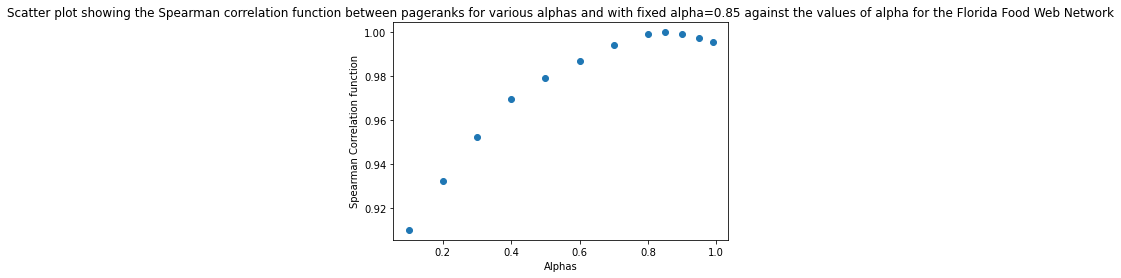

In [9]:
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,0.99]                                 #defining a list of all alphas

pr_dict=nx.pagerank(food_web,alpha=0.85)                                                   #obtaining the pagerank dictionary for alpha=0.85
pr_fixed_list=list(pr_dict.values())                                                       #extracting out only the page rank values to form a list

spearman_list=[]                                                                           #creating a spearman correlation values list for various alphas

for i in alpha:                                                                            #iterating over the alpha list
    pr=nx.pagerank(food_web,alpha=i)                                                       #finding the page rank for a given value of alpha
    pr_list=list(pr.values())                                                              #extarcting the pagerank to form its list
    spearman=sp.spearmanr(pr_fixed_list,pr_list)[0]                                        #finding the spearman correlation between the two pageranks
    spearman_list.append(spearman)                                                         #appending the spearman correlation value in its list
    
plt.scatter(alpha,spearman_list)                                                           #plotting the scatter plot-defining it
plt.xlabel("Alphas")                                                                       #labelling the x axis
plt.ylabel("Spearman Correlation function")                                                #labelling the y axis
plt.title("Scatter plot showing the Spearman correlation function between pageranks for various alphas and with fixed alpha=0.85 against the values of alpha for the Florida Food Web Network")     #title of the graph
plt.show()                                                                                 #displaying the graph